In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

import string
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords,wordnet

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ryankirkland/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df = pd.read_csv('../data/total_reviews.csv')
cleaned = pd.read_csv('../data/cleaned_reviews.csv')

In [4]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [5]:
df['asin'].unique()

array(['B08267BBJT', 'B08268F6XN', 'B08267X3LH', 'B079JFK22D',
       'B07QW531W2', 'B07TJTQDYG', 'B085HB8QVX', 'B07R2KK5P7',
       'B07Y475MD3', 'B07F27PK2M', 'B085FZFVQV', 'B072R2SWXX',
       'B0828KRQZ3', 'B0821ZNWKW', 'B07QV15B3W', 'B07MWYYDTM',
       'B07RSJMS76', 'B07D1LMMDD', 'B0855TM65T', 'B07NTXYFBV',
       'B086L3Q8YX', 'B085FT4YR1', 'B085XT3GTW', 'B07P9XZPYG',
       'B0824WB5ST', 'B07HQ7QV7W', 'B083ZMYF55', 'B07FQD7PZ5',
       'B07TWDR7VJ', 'B085DV7VZK', 'B086GTFGPP', 'B07Q6PZ2F4',
       'B082W54KQK'], dtype=object)

In [17]:
def get_wordnet_pos(pos_tag):

    if pos_tag.startswith('J'):
        return wordnet.ADJ 

    elif pos_tag.startswith('V'):
        return wordnet.VERB 

    elif pos_tag.startswith('N'):
        return wordnet.NOUN

    elif pos_tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN # default, return wordnet tag "NOUN"

#Create a function to lemmatize tokens in the reviews
def lemmatized_tokens(text):
        text = text.lower()
        pattern = r'\b[a-zA-Z]{3,}\b'                 
        tokens = nltk.regexp_tokenize(text, pattern) # tokenize the text
        tagged_tokens = nltk.pos_tag(tokens)  # a list of tuples (word, pos_tag)
          
        stop_words = stopwords.words('english')
        new_stopwords = []  #customize extra stop_words
        stop_words.extend(new_stopwords)
        stop_words = set(stop_words)
        
        wordnet_lemmatizer = WordNetLemmatizer()
        # get lemmatized tokens                             #call function "get_wordnet_pos"
        lemmatized_words=[wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) 
                  # tagged_tokens is a list of tuples (word, tag)
                  for (word, tag) in tagged_tokens \
                  # remove stop words
                  if word not in stop_words and \
                  # remove punctuations
                  word not in string.punctuation]

        return lemmatized_words

In [8]:
cleaned = cleaned.drop('Unnamed: 0', axis=1)

In [23]:
cleaned.head()

,asin,product,date,verified,title,desc,reviewer_name,rating,month,year,month_year,title_desc
0,B08267BBJT,AAA,2020-08-11,Verified Purchase,"Didn't work, then worked, now don't work again",All I got in terms of use out of these batter...,Jasmine Carroll,1.0,8,2020,2020-08,"Didn't work, then worked, now don't work again..."
1,B08267BBJT,AAA,2020-07-30,Verified Purchase,These absolutely suck,I bought these for a wall mounted magnifying ...,Ashlee M.,1.0,7,2020,2020-07,These absolutely suck I bought these for a wal...
2,B08268F6XN,AA,2020-07-19,Verified Purchase,longer lasting battery for remote controller!!,i like the constant voltage and hopefully it ...,ARCHANGEL TROY,5.0,7,2020,2020-07,longer lasting battery for remote controller!!...
3,B08267BBJT,AAA,2020-07-18,Verified Purchase,Minimal plastic in packaging.,"Just received these today, but I’m reviewing ...",ira,5.0,7,2020,2020-07,Minimal plastic in packaging. Just received th...
4,B08267BBJT,AAA,2020-07-17,Verified Purchase,Not long enough battery life for a night hike,Shuts off suddenly in headlamp,T,3.0,7,2020,2020-07,Not long enough battery life for a night hike ...


In [11]:
test_txt = cleaned.loc[0, 'title_desc']

In [18]:
lemmed_test = lemmatized_tokens(test_txt)

In [19]:
lemmed_test

['work',
 'work',
 'work',
 'get',
 'term',
 'use',
 'battery',
 'three',
 'day',
 'use',
 'two',
 'additional',
 'success',
 'buy',
 'bleed',
 'aaa',
 'battery',
 'hop',
 'compact',
 'design',
 'would',
 'better',
 'something',
 'bulky',
 'right',
 'box',
 'charge',
 'light',
 'green',
 'indicate',
 'fully',
 'charge',
 'try',
 'use',
 'couple',
 'device',
 'luck',
 'go',
 'return',
 'friend',
 'suggest',
 'switch',
 'charge',
 'extension',
 'cord',
 'directly',
 'wall',
 'socket',
 'think',
 'trick',
 'even',
 'though',
 'thought',
 'silly',
 'try',
 'battery',
 'device',
 'let',
 'charge',
 'overnight',
 'plug',
 'directly',
 'wall',
 'socket',
 'work',
 'work',
 'well',
 'three',
 'day',
 'later',
 'device',
 'stop',
 'work',
 'middle',
 'high',
 'power',
 'usage',
 'hair',
 'trimmer',
 'swap',
 'battery',
 'two',
 'charge',
 'entire',
 'time',
 'work',
 'go',
 'buy',
 'regular',
 'aaa',
 'battery',
 'device',
 'go',
 'back',
 'work',
 'fine',
 'try',
 'battery',
 'device',
 'work'

In [31]:
#Create a function to build the optimal LDA model
def optimal_lda_model(df, review_colname):
    '''
    INPUTS:
        df_review - dataframe that contains the reviews
        review_colname: name of column that contains reviews
        
    OUTPUTS:
        lda_tfidf - Latent Dirichlet Allocation (LDA) model
        dtm_tfidf - document-term matrix in the tfidf format
        tfidf_vectorizer - word frequency in the reviews
        A graph comparing LDA Model Performance Scores with different params
    '''
    docs_raw = df[review_colname].tolist()

    #************   Step 1: Convert to document-term matrix   ************#

    #Transform text to vector form using the vectorizer object 
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                    stop_words = 'english',
                                    lowercase = True,
                                    token_pattern = r'\b[a-zA-Z]{3,}\b', # num chars > 3 to avoid some meaningless words
                                    max_df = 0.8,                        # discard words that appear in > 90% of the reviews
                                    min_df = 10)                         # discard words that appear in < 10 reviews    

    #apply transformation
    tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

    #convert to document-term matrix
    dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)  

    print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_colname, dtm_tfidf.shape[1]))

    
    #*******   Step 2: GridSearch & parameter tuning to find the optimal LDA model   *******#

    # Define Search Param
    search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                     'learning_decay': [.5, .7, .9]}

    # Init the Model
    lda = LatentDirichletAllocation()

    # Init Grid Search Class
    model = GridSearchCV(lda, param_grid=search_params)

    # Do the Grid Search
    model.fit(dtm_tfidf)


    #*****  Step 3: Output the optimal lda model and its parameters  *****#

    # Best Model
    best_lda_model = model.best_estimator_

    # Model Parameters
    print("Best Model's Params: ", model.best_params_)

    # Log Likelihood Score: Higher the better
    print("Model Log Likelihood Score: ", model.best_score_)

    # Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
    print("Model Perplexity: ", best_lda_model.perplexity(dtm_tfidf))


    #***********   Step 4: Compare LDA Model Performance Scores   ***********#

    #Get Log Likelyhoods from Grid Search Output
    gscore=model.fit(dtm_tfidf).cv_results_
    n_topics = [5, 10, 15, 20, 25, 30]

    log_likelyhoods_5 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.5]
    log_likelyhoods_7 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.7]
    log_likelyhoods_9 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.9]

    # Show graph
    plt.figure(figsize=(12, 8))
    plt.plot(n_topics, log_likelyhoods_5, label='0.5')
    plt.plot(n_topics, log_likelyhoods_7, label='0.7')
    plt.plot(n_topics, log_likelyhoods_9, label='0.9')
    plt.title("Choosing Optimal LDA Model")
    plt.xlabel("Num Topics")
    plt.ylabel("Log Likelyhood Scores")
    plt.legend(title='Learning decay', loc='best')
    plt.show()
    
    return gscore, best_lda_model, dtm_tfidf, tfidf_vectorizer

In [33]:
gscore, best_lda_model, dtm_tfidf, tfidf_vectorizer = optimal_lda_model(cleaned, 'title_desc')

/Users/ryankirkland/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1798: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


The shape of the tfidf is (4745, 1120), meaning that there are 4745 title_desc and 1120 tokens made through the filtering process.


KeyboardInterrupt: 

In [34]:
g = pd.DataFrame(gscore)

In [35]:
g

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_decay,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.845956,0.104144,0.153028,0.008257,0.5,5,"{'learning_decay': 0.5, 'n_components': 5}",-28488.558606,-28930.989002,-27153.294572,-22561.875711,-22773.777617,-25981.699101,2769.160296,3
1,4.790072,0.136663,0.127356,0.009912,0.5,10,"{'learning_decay': 0.5, 'n_components': 10}",-33087.416985,-33513.216148,-30551.072069,-25346.915472,-26303.785883,-29760.481311,3382.450596,5
2,4.786485,0.221351,0.133783,0.008054,0.5,15,"{'learning_decay': 0.5, 'n_components': 15}",-35253.444208,-35915.864000,-34697.528019,-28949.165100,-28021.033834,-32567.407032,3368.250559,8
3,5.026420,0.134606,0.138743,0.009025,0.5,20,"{'learning_decay': 0.5, 'n_components': 20}",-38738.205443,-39143.454406,-37213.094375,-32353.431606,-30823.541876,-35654.345541,3416.034759,12
4,4.966580,0.118991,0.137061,0.011771,0.5,25,"{'learning_decay': 0.5, 'n_components': 25}",-40890.790108,-42208.995511,-38992.560353,-33969.188965,-33496.305939,-37911.568175,3565.082989,15
5,4.834590,0.165225,0.136654,0.008059,0.5,30,"{'learning_decay': 0.5, 'n_components': 30}",-42312.718053,-42835.708947,-40528.415772,-35837.246247,-36164.727810,-39535.763366,2987.620678,16
6,6.020092,0.193916,0.153264,0.005375,0.7,5,"{'learning_decay': 0.7, 'n_components': 5}",-28384.681008,-28500.782516,-27141.818990,-22248.838749,-22571.661941,-25769.556641,2785.805419,2
7,5.220248,0.150028,0.149348,0.017156,0.7,10,"{'learning_decay': 0.7, 'n_components': 10}",-32136.400816,-32668.045994,-31263.006276,-25633.120238,-26415.223464,-29623.159358,2982.887194,4
8,5.390310,0.393962,0.143945,0.005179,0.7,15,"{'learning_decay': 0.7, 'n_components': 15}",-35405.972626,-36358.420192,-33618.448165,-29563.799087,-28930.848376,-32775.497689,3018.729329,9
9,5.142307,0.124830,0.137806,0.014752,0.7,20,"{'learning_decay': 0.7, 'n_components': 20}",-37413.359244,-38599.003660,-37385.390037,-30739.987513,-31671.982882,-35161.944667,3272.903597,10


In [36]:
#Create a function to inspect the topics we created 
def display_topics(model, feature_names, n_top_words):
    '''
    INPUTS:
        model - the model we created
        feature_names - tells us what word each column in the matric represents
        n_top_words - number of top words to display

    OUTPUTS:
        a dataframe that contains the topics we created and the weights of each token
    '''
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx+1)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx+1)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


display_topics(best_lda_model, tfidf_vectorizer.get_feature_names(), n_top_words = 20)

,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights
0,batteries,74.2,batteries,100.2,batteries,127.3,great,194.1,batteries,43.3
1,charge,40.9,charge,80.4,usb,80.4,good,146.9,lights,26.0
2,work,38.1,battery,50.9,good,72.8,works,101.5,good,24.9
3,money,35.1,use,41.9,rechargeable,67.6,product,89.2,worked,24.6
4,buy,34.6,charged,40.4,battery,66.5,value,70.7,work,23.8
5,use,30.6,hold,40.2,charge,65.9,batteries,70.3,fine,23.6
6,long,26.1,long,38.7,charger,55.6,price,66.3,charger,23.4
7,don,25.7,camera,38.4,charging,52.3,long,53.9,battery,20.9
8,china,25.6,hours,34.2,like,49.1,work,49.4,charged,20.0
9,japan,22.6,don,31.0,great,48.6,far,43.6,charge,19.2


In [3]:
import gensim
from gensim.utils import simple_preprocess

In [4]:
import re

cleaned['processed_reviews'] = cleaned['title_desc'].apply(lambda x: re.sub('[,\.!?]', '', str(x)))

In [5]:
cleaned['processed_reviews'] = cleaned['processed_reviews'].apply(lambda x: x.lower())

In [6]:
def reviews_to_words(reviews):
    review_list = reviews.values.tolist()
    for review in reviews:
        yield(simple_preprocess(review, deacc=True)) #deacc=True removes punc

In [7]:
tokens = list(reviews_to_words(cleaned['processed_reviews']))

In [8]:
bigrams = gensim.models.Phrases(tokens, min_count=2)
bigram_mod = gensim.models.phrases.Phraser(bigrams)

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryankirkland/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = stopwords.words('english')
stop_words.extend(['good', 'battery', 'batteries', 'use', 'get', 'great', 'buy'])

import spacy

# Define functions for stopwords, lemmatization, bigrams, and trigrams

def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
# Remove Stop Words
data_words_nostops = remove_stopwords(tokens)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [18]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 4), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 5), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 2), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 2), (60, 1), (61, 9), (62, 1), (63, 1)]]


In [19]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [20]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"charge" + 0.016*"long" + 0.013*"life" + 0.007*"capacity" + '
  '0.007*"seem" + 0.006*"recharge" + 0.006*"hold_charge" + 0.006*"volt" + '
  '0.006*"issue" + 0.006*"well"'),
 (1,
  '0.054*"work" + 0.030*"product" + 0.019*"price" + 0.019*"rechargeable" + '
  '0.017*"far" + 0.017*"quality" + 0.014*"make" + 0.012*"expect" + '
  '0.011*"charge" + 0.011*"well"'),
 (2,
  '0.036*"charge" + 0.020*"use" + 0.019*"value" + 0.016*"time" + '
  '0.014*"rechargeable" + 0.013*"far" + 0.013*"charger" + 0.012*"recharge" + '
  '0.012*"usb" + 0.011*"work"'),
 (3,
  '0.020*"charge" + 0.017*"charger" + 0.016*"use" + 0.015*"work" + '
  '0.014*"rechargeable" + 0.012*"power" + 0.010*"light" + 0.010*"capacity" + '
  '0.009*"last" + 0.007*"day"'),
 (4,
  '0.058*"charge" + 0.017*"use" + 0.016*"last" + 0.016*"rechargeable" + '
  '0.013*"time" + 0.013*"charger" + 0.011*"work" + 0.009*"need" + 0.009*"buy" '
  '+ 0.008*"long"')]


In [62]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.44626446266732095


In [33]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [36]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [37]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

 50%|█████     | 270/540 [34:28<34:28,  7.66s/it]  


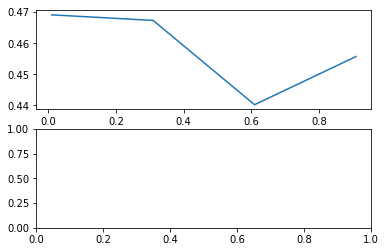

In [56]:
fig, axs = plt.subplots(2)
axs[0].plot(mr_alpha_group['Alpha'], mr_alpha_group['Coherence'])

In [49]:
mr = pd.DataFrame(model_results)

In [47]:
mr['Alpha'] = mr['Alpha'].map({'symmetric': 0})

In [50]:
mr['Alpha'].unique()

array([0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 'asymmetric'],
      dtype=object)

In [51]:
mr_alpha = mr[(mr['Alpha'] != 'symmetric') & (mr['Alpha'] != 'asymmetric')]

In [55]:
mr_alpha_group = mr_alpha.groupby('Alpha').mean().reset_index()

In [60]:
mr.sort_values('Coherence', ascending=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
38,100% Corpus,3,0.31,0.91,0.552422
158,100% Corpus,7,0.31,0.91,0.547111
203,100% Corpus,8,symmetric,0.91,0.542077
188,100% Corpus,8,0.31,0.91,0.537118
218,100% Corpus,9,0.31,0.91,0.535743
...,...,...,...,...,...
168,100% Corpus,7,0.91,0.91,0.350577
48,100% Corpus,3,0.91,0.91,0.349813
258,100% Corpus,10,0.91,0.91,0.348432
18,100% Corpus,2,0.91,0.91,0.344646


In [63]:
0.552422/0.44626446

1.2378803366954205

In [64]:
final_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.31,
                                           eta=0.91)

In [66]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(final_lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.081357  0.008839       1        1  61.804134
1      0.032759 -0.072525       2        1  24.936058
0      0.048598  0.063686       3        1  13.259804, topic_info=         Term         Freq        Total Category  logprob  loglift
263     value   240.000000   240.000000  Default  30.0000  30.0000
61       work  1130.000000  1130.000000  Default  29.0000  29.0000
8      charge  2591.000000  2591.000000  Default  28.0000  28.0000
92       last   716.000000   716.000000  Default  27.0000  27.0000
94       long   456.000000   456.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
24        get    33.522385   380.255981   Topic3  -5.6639  -0.4082
213      come    31.831244   332.337128   Topic3  -5.7156  -0.3253
445      take    31.030367   300.212677   Topic3  -5.7411  -0.2491
57        try    30.090670   291.373474   Topic3  -5.7719  -0.2500
79   recharge    29.604767   523.819946   Topic3  -5.7882  -0.8528

[234 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3579      1  0.144394  accept_charge
3579      2  0.144394  accept_charge
3579      3  0.721968  accept_charge
337       1  0.011205      advertise
337       2  0.974819      advertise
...     ...       ...            ...
716       2  0.114395           year
716       3  0.040855           year
447       1  0.942257            yet
447       2  0.043826            yet
447       3  0.010956            yet

[513 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])